In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns
from scipy.stats import mode

In [4]:
n2l = np.load('../data/map.npy')[()]['n2l']

pred_nnsoft_val=np.load('../pred_nnsoft_val.npy')
pred_svm_val=np.load('../pred_svm_val.npy')
pred_nnsig_val=np.load('../pred_nnsig_val.npy')

pred_nnsoft_test=np.load('../pred_nnsoft_test.npy')
pred_svm_test=np.load('../pred_svm_test.npy')
pred_nnsig_test=np.load('../pred_nnsig_test.npy')

In [132]:
# voting
test = []
for i in range(len(pred_nnsig_test)):
    #print [pred_nnsoft_val[i],pred_nnsig_val[i],pred_svm_val[i]]
    a,b = mode([pred_nnsoft_test[i],pred_nnsig_test[i],pred_svm_test[i]])
    if b[0] == 1:
        test.append(pred_nnsig_test[i])
    else:
        test.append(a[0])

In [ ]:
# write results
d = {'Cell Type': [n2l[i] for i in test]}
TEST_LAB_DF = pd.DataFrame(data=d)
TEST_LAB_DF.to_csv(path_or_buf='./test_predicted_labels.tsv',sep='\t',index=False)
# read back
# pd.read_csv( './test_predicted_labels.tsv', sep='\t')

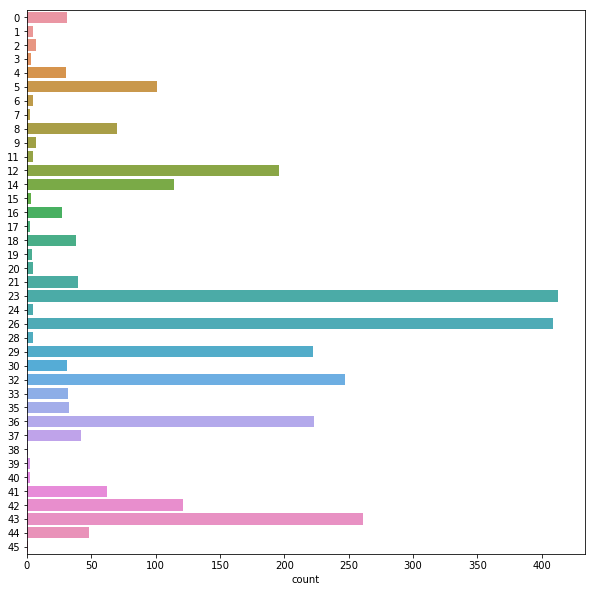

In [145]:
plt.figure(figsize=(10,10))
sns.countplot(y=test)

In [2]:
# read tf record
ls = []
tfrecords_filename = '../data/val.tfrecords'
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename.format(0))
for i,string_record in enumerate(record_iterator):
    example = tf.train.Example()
    example.ParseFromString(string_record)
    img_string = (example.features.feature)
    ls.append( img_string['label'].int64_list.value[0] )
    #print i
    #print ls[-1]
    # print np.sum(img_string['data'].float_list.value)
    #if i==100:
    #    break

In [122]:
# validation accuracy
sum(np.asarray(ls) == val)/float(len(ls))

0.5702283498492029

In [ ]:
# use pandas to validate results
pred_svm_test = pd.DataFrame(pred_svm_test)
pred_nnsoft_test = pd.DataFrame(pred_nnsoft_test)
pred_nnsig_test = pd.DataFrame(pred_nnsig_test)
subm_all = pd.concat([pred_svm_test, pred_nnsoft_test,pred_nnsig_test],1)
subm_all.mode(axis=1) 